<a href="https://colab.research.google.com/github/HardProxy/data-visualization/blob/main/data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Final** do Curso de Visualização de Dados



Esse trabalho final tem o objetivo de analisar a coleção de dados do COVID-19  pela Base da Dados do **Our Wolrd In Data**.

A análise de correlação será feita entre 

1.   Facilidades em Lavar as Mãos Vs Espectativa de Vida
2.   Idade 65 Vs Fumantes Homens/Mulheres 
3.   Idade 70 Vs Fumantes Homens/Mulheres
4.   Leitos de Hospital Vs População 

Além disso também serão construídos as séries temporais de **Casos Confirmados**, **Novos Casos**, **Óbitos** e **Novos Óbitos** para países com diferentes valores de Índice de Desenvolvimento Humano (IDH).


> **Link para Download do dados** : https://covid.ourworldindata.org/data/owid-covid-data.csv


**Informações Sobre** :

> **Nome** : Otaviano Cruz 

>  **Curso** : Física Computacional

## Download Dados e Importação de Módulos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from urllib.request import Request, urlopen
import datetime as dt
import io
import gzip

In [ ]:
url = " https://covid.ourworldindata.org/data/owid-covid-data.csv"

request = Request(url, headers={"User-Agent": "python-urllib"})
response = urlopen(request)
data = response.read().decode("utf-8")
df = pd.read_csv(io.StringIO(data))

In [ ]:
df.info()

## Análise de Correlação


### Handwashing Vs Life Expectancy

In [ ]:
handwash = df.handwashing_facilities.copy()
life_expectancy = df.life_expectancy.copy()

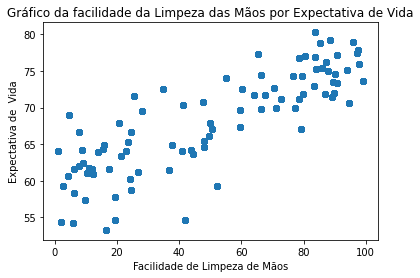

In [ ]:
plt.title('Gráfico da facilidade da Limpeza das Mãos por Expectativa de Vida')
plt.xlabel('Facilidade de Limpeza de Mãos')
plt.ylabel('Expectativa de Vida')
plt.scatter(handwash,life_expectancy)

O gráfico evidencia um comportamento já esperado. Aqueles países que tem maior espectativa de vida dão mais condições para que as pessoas possam realizar uma prática tão simples de higiene. 

Por isso é possível observar uma correlação observada pelo gráfico.



### Hospital Beds Vs Population

In [ ]:
hosp_bed = df.hospital_beds_per_thousand.copy()
pop_density = df.population_density.copy()

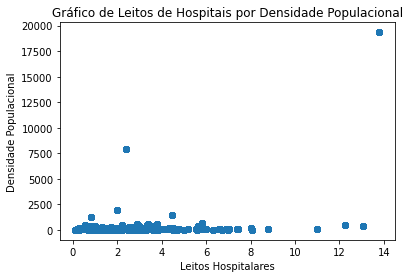

In [ ]:
plt.title('Gráfico de Leitos de Hospitais por Densidade Populacional')
plt.xlabel('Leitos Hospitalares')
plt.ylabel('Densidade Populacional')
#plt.ylim(0,500)
plt.scatter(hosp_bed,pop_density)

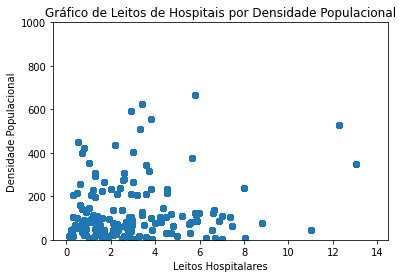

In [ ]:
plt.title('Gráfico de Leitos de Hospitais por Densidade Populacional')
plt.xlabel('Leitos Hospitalares')
plt.ylabel('Densidade Populacional')
plt.ylim(0,1000)
plt.scatter(hosp_bed,pop_density)

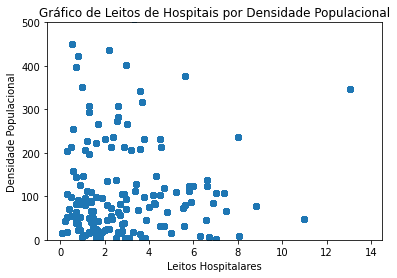

In [ ]:
plt.title('Gráfico de Leitos de Hospitais por Densidade Populacional')
plt.xlabel('Leitos Hospitalares')
plt.ylabel('Densidade Populacional')
plt.ylim(0,500)
plt.scatter(hosp_bed,pop_density)

Antes da confecção do gráfico de Leitos de Hospitais por Densidade Populacinal tinha-se como espectativa a proporcionalidade entre os parâmetros. Porém não é um comportamento observado.

Alterando a escala do gráfico e reduzindo os valores possíveis de Densidade Populaacional podemos retirar OUTLIERS e fazer uma análise no comportamento próximo da média, podemos ver que não há uma correlação evidente entre os dois parâmetros.

Podemos fazer análises para diferente parâmetros ou escalas para que possamos observar algum comportamento linear.



### Aged 65 Vs Female/Male Smokers

In [ ]:
aged_65 = df.aged_65_older.copy()
female_smokers = df.female_smokers.copy()
male_smokers = df.male_smokers.copy()

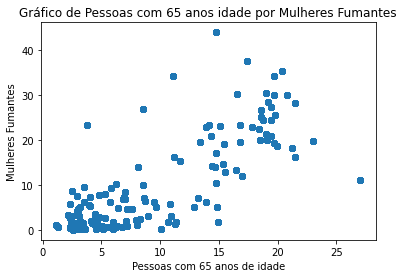

In [ ]:
plt.title('Gráfico de Pessoas com 65 anos idade por Mulheres Fumantes')
plt.xlabel('Pessoas com 65 anos de idade')
plt.ylabel('Mulheres Fumantes')
plt.scatter(aged_65, female_smokers)

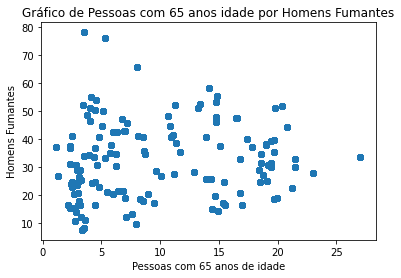

In [ ]:
plt.title('Gráfico de Pessoas com 65 anos idade por Homens Fumantes')
plt.xlabel('Pessoas com 65 anos de idade')
plt.ylabel('Homens Fumantes')
plt.scatter(aged_65, male_smokers)

### Aged 70 Vs Female/Male Smokers

In [ ]:
aged_70 = df.aged_70_older.copy()
female_smokers = df.female_smokers.copy()
male_smokers = df.male_smokers.copy()

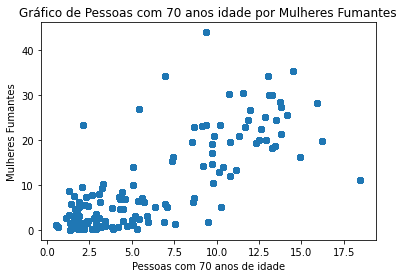

In [ ]:
plt.title('Gráfico de Pessoas com 70 anos idade por Mulheres Fumantes')
plt.xlabel('Pessoas com 70 anos de idade')
plt.ylabel('Mulheres Fumantes')
plt.scatter(aged_70, female_smokers)

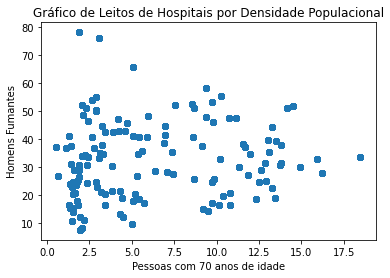

In [ ]:
plt.title('Gráfico de Leitos de Hospitais por Densidade Populacional')
plt.xlabel('Pessoas com 70 anos de idade')
plt.ylabel('Homens Fumantes')
plt.scatter(aged_70, male_smokers)

### Análise gráficos Aged 65/70 Vs Male/Female Smokers

O comportamento dos dados ao mudar o parâmetro de idade não é alterado significativamente. Porém ao mudarmos o sexo dos indivíduos é possível observar uma clara diminuição de disperção do Female em relação ao Male.

## Gráficos de Avanço da Doença em países com alto IDH e em países com baixo IDH

### Series Temporais da Alemanha (IDH = .939) para o avanço do COVID-19

In [ ]:
pais = 'Germany'
pais_df = df[df['location'] == pais].copy()
pais_df['date'] = pd.to_datetime(pais_df.date)

In [ ]:
pais_index = pd.DatetimeIndex(pais_df.date.values)
pais_df.set_index(pais_index, inplace=True)
pais_df.index.name = 'day'
pais_df.drop('date',axis=1, inplace=True)

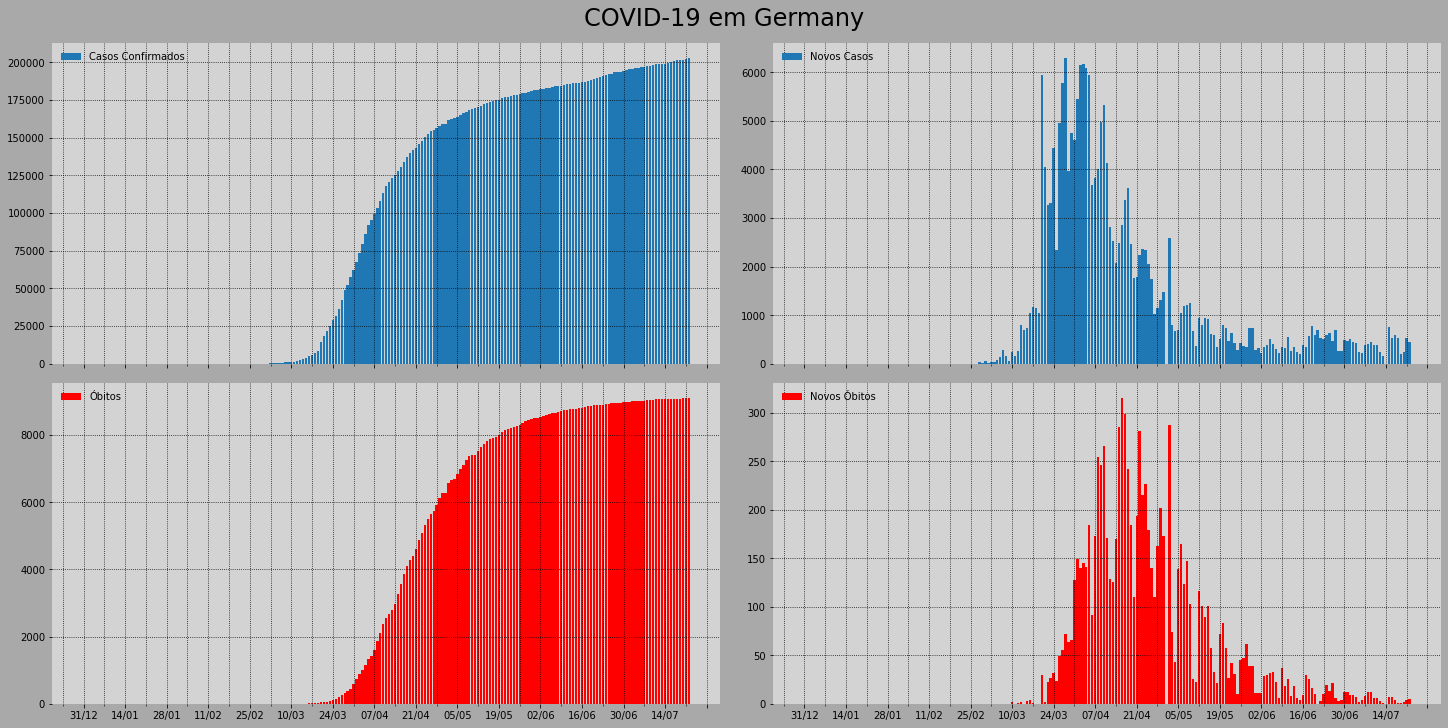

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+pais, fontsize=24)
x = pais_df.index.strftime("%d/%m")
axs[0, 0].bar(x, pais_df.total_cases, label = 'Casos Confirmados')
axs[0, 1].bar(x, pais_df.new_cases, label = 'Novos Casos')
axs[1, 0].bar(x, pais_df.total_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(x, pais_df.new_deaths, label = 'Novos Óbitos', color = 'red')

for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

### Series Temporais de Singapura (IDH = .935) para o avanço do COVID-19

In [ ]:
pais = 'Singapore'
pais_df = df[df['location'] == pais].copy()
pais_df['date'] = pd.to_datetime(pais_df.date)

In [ ]:
pais_index = pd.DatetimeIndex(pais_df.date.values)
pais_df.set_index(pais_index, inplace=True)
pais_df.index.name = 'day'
pais_df.drop('date',axis=1, inplace=True)

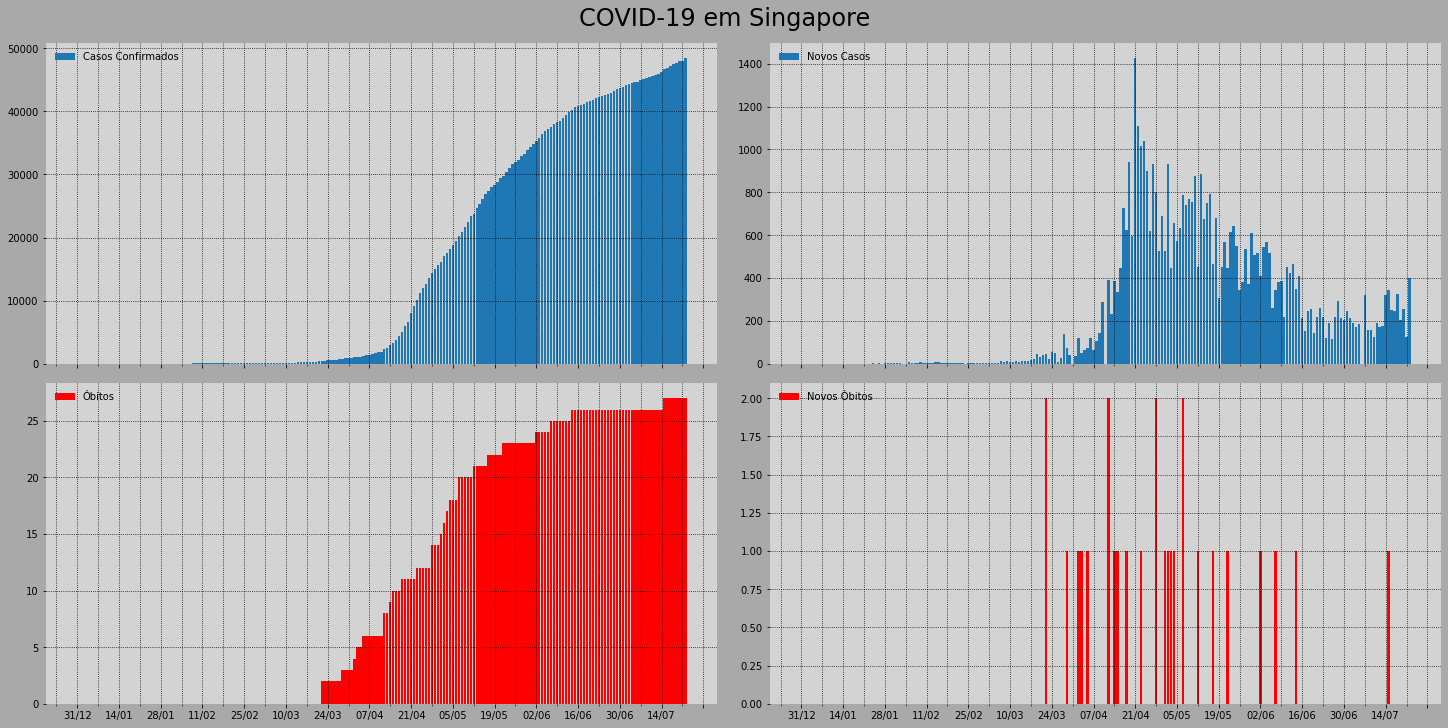

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+pais, fontsize=24)
x = pais_df.index.strftime("%d/%m")
axs[0, 0].bar(x, pais_df.total_cases, label = 'Casos Confirmados')
axs[0, 1].bar(x, pais_df.new_cases, label = 'Novos Casos')
axs[1, 0].bar(x, pais_df.total_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(x, pais_df.new_deaths, label = 'Novos Óbitos', color = 'red')

for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

### Series Temporais da Síria (IDH = .549) para o avanço do COVID-19

In [ ]:
pais = 'Syria'
pais_df = df[df['location'] == pais].copy()
pais_df['date'] = pd.to_datetime(pais_df.date)

In [ ]:
pais_index = pd.DatetimeIndex(pais_df.date.values)
pais_df.set_index(pais_index, inplace=True)
pais_df.index.name = 'day'
pais_df.drop('date',axis=1, inplace=True)

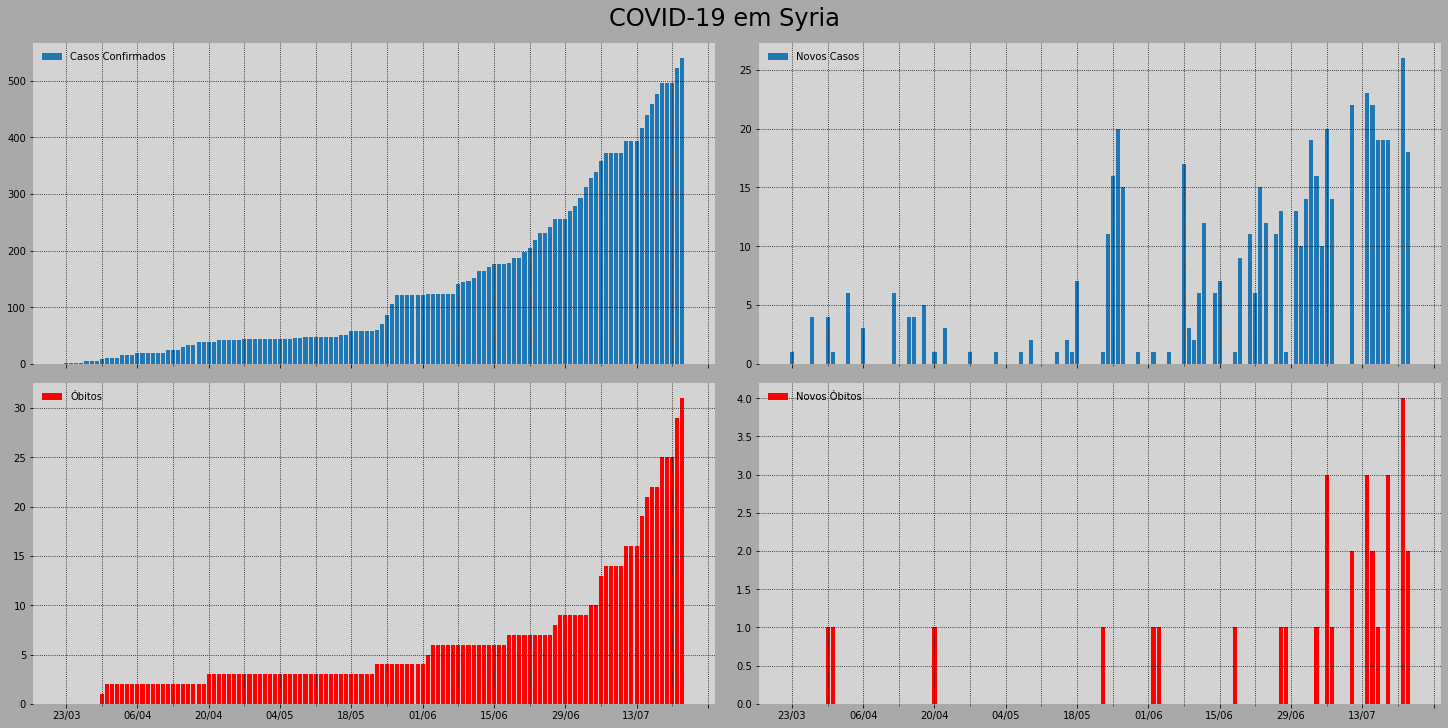

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+pais, fontsize=24)
x = pais_df.index.strftime("%d/%m")
axs[0, 0].bar(x, pais_df.total_cases, label = 'Casos Confirmados')
axs[0, 1].bar(x, pais_df.new_cases, label = 'Novos Casos')
axs[1, 0].bar(x, pais_df.total_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(x, pais_df.new_deaths, label = 'Novos Óbitos', color = 'red')

for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

### Series Temporais da 	Moçambique (IDH = .446) para o avanço do COVID-19

In [ ]:
pais = 'Mozambique'
pais_df = df[df['location'] == pais].copy()
pais_df['date'] = pd.to_datetime(pais_df.date)

In [ ]:
pais_index = pd.DatetimeIndex(pais_df.date.values)
pais_df.set_index(pais_index, inplace=True)
pais_df.index.name = 'day'
pais_df.drop('date',axis=1, inplace=True)

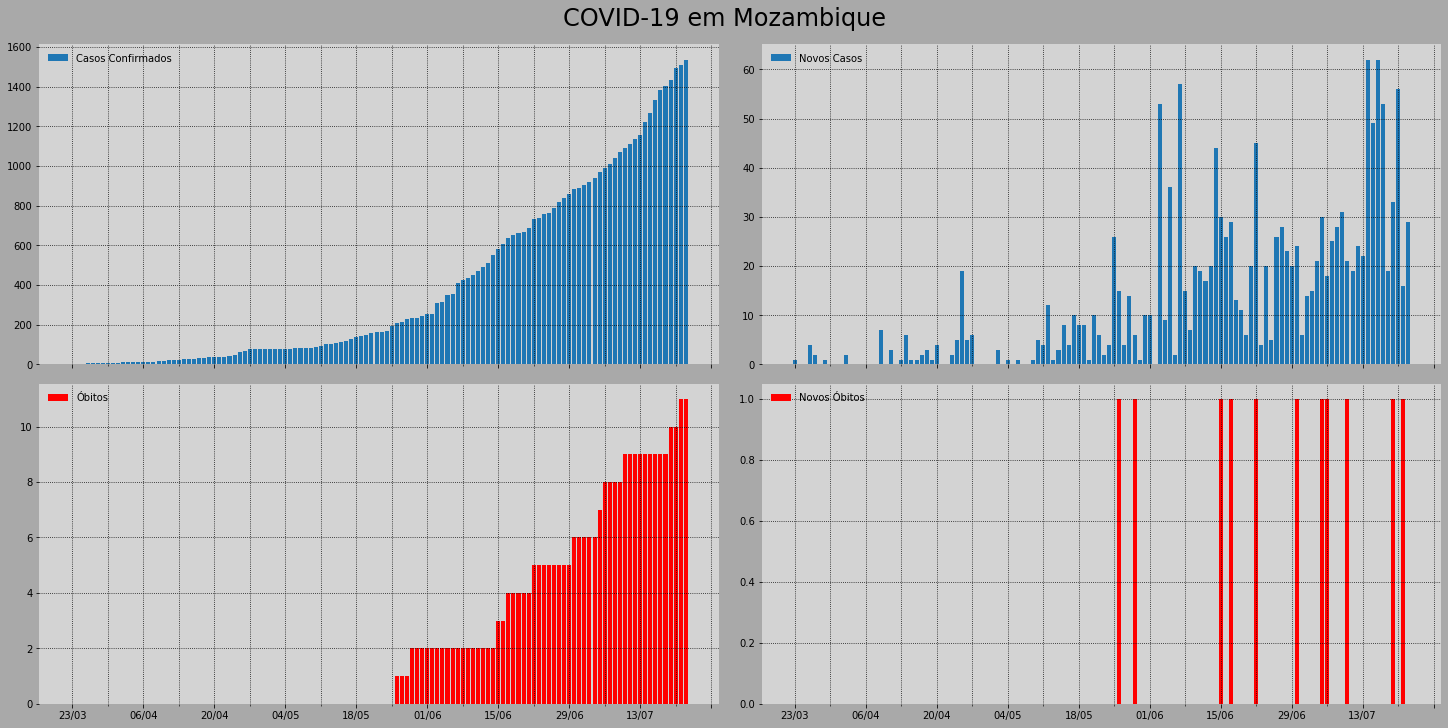

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10), facecolor='darkgrey', constrained_layout=True, sharex=True)
fig.suptitle("COVID-19 em "+pais, fontsize=24)
x = pais_df.index.strftime("%d/%m")
axs[0, 0].bar(x, pais_df.total_cases, label = 'Casos Confirmados')
axs[0, 1].bar(x, pais_df.new_cases, label = 'Novos Casos')
axs[1, 0].bar(x, pais_df.total_deaths, label = 'Óbitos', color='red')
axs[1, 1].bar(x, pais_df.new_deaths, label = 'Novos Óbitos', color = 'red')

for a1 in range(len(axs)):
  for a2 in range(len(axs[a1])):
    axs[a1, a2].legend(frameon=False, loc='upper left')
    axs[a1,a2].xaxis.set_major_locator(plt.MultipleLocator(14))
    axs[a1,a2].xaxis.set_minor_locator(plt.MultipleLocator(7))
    axs[a1,a2].grid(b=True, which='both', color='black', linestyle=':')
    axs[a1,a2].set_facecolor('lightgrey')
    axs[a1,a2].spines['right'].set_visible(False)
    axs[a1,a2].spines['top'].set_visible(False)
    axs[a1,a2].spines['left'].set_visible(False)
    axs[a1,a2].spines['bottom'].set_visible(False)

### Análise de Gráficos do curso do COVID-19


Para fim de análise qualitativa, os gráficos do avanço do COVID-19 em países com diferentes IDHs podem nos dar uma ideia do comportamento da doença em diferentes tipos de condições de higiene, saúde e de como a coleta de dados é feita.

Em países de alto IDH ( Alemanha e Singapura) é evidente a preocupação na coleta contínua de dados da doença, já que observamos atualizações frequentes e podemos analisar o comportamento da doença com maior precisão.

Já em países com baixo IDH ( Moçambique e Síria ) não é observada a mesma condição de coleta em relação à coleta de dados, mesmo em diferentes estágios da doença. Parte desse problema pode está  relacionado à baixa taxa de testagem para o COVID-19.




